In [1]:
# python
import sys, os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
import mplhep as hep
#hep.cms.label(data=False, lumi=None, year=None, rlabel="Simulation")  

In [2]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

Connection method: Direct,
Dashboard: /user/maria.jose@cern.ch/proxy/8787/status,
Comm: tls://192.168.202.60:8786,Workers: 0
Dashboard: /user/maria.jose@cern.ch/proxy/8787/status,Total threads: 0
Started: 11 hours ago,Total memory: 0 B


In [3]:
samples = [
    #"2Mu2E_100GeV_5GeV_400mm",
    #"2Mu2E_100GeV_5GeV_400mm",
    #"2Mu2E_150GeV_5GeV_2p7mm",
    "2Mu2E_200GeV_0p25GeV_10p0mm",
     "2Mu2E_200GeV_1p2GeV_48p0mm",
     "2Mu2E_200GeV_5p0GeV_200p0mm",
     "2Mu2E_1000GeV_0p25GeV_2p0mm",
     "2Mu2E_1000GeV_5p0GeV_40p0mm"
    #"2Mu2E_500GeV_5GeV_80mm",
    #"2Mu2E_800GeV_5GeV_0p5mm",
    #"2Mu2E_1000GeV_5GeV_0p4mm",
    #"2Mu2E_1000GeV_5GeV_0p04mm",
    #"2Mu2E_1000GeV_5GeV_20mm",
    #"2Mu2E_100GeV_1p2GeV_9p6mm",
    #"2Mu2E_1000GeV_5GeV_40mm",
    #"2Mu2E_100GeV_p25GeV_400mm",
   # "2Mu2E_1000GeV_5GeV_4mm",
    
]
fileset = utilities.make_fileset(samples, 
                                 "llpNanoAOD_v2", 
                                 location_cfg="signal_2mu2e_v10.yaml",
                                  # max_files =10
                                  # max_files =1
                                )

In [4]:
channels = [
    # "baseNoLj", 
    "baseNoLj_A_ee_highPtA_lowLxyA",
    "baseNoLj_A_ee_matched_lj_highPT_lowLxyA",
    #"baseNoLj_A_ee_highPtA",
    #"baseNoLj_A_ee_matched_lj_highPT",
    "baseNoLj_A_ee_lowLxyA",
    "baseNoLj_A_ee_matched_lj_lowLxyA"
    
           
           ]
p = sidm_processor.SidmProcessor(
    channels,
    ["lj_reco_effi_base",],
    lj_reco_choices=["0.4"],
    unweighted_hist=True,
   
)
runner = processor.Runner(
    executor=processor.FuturesExecutor(),
    # executor=processor.DaskExecutor(client=client),
    schema=NanoAODSchema,
    #maxchunks=1,
    #skipbadfiles=True,
    savemetrics=True,
)
# test if processor is serializable
output = runner.run(fileset, treename="Events", processor_instance=p)


Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in divide
  result = getattr(ufunc, method)(


#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb


In [5]:
ch2 = "baseNoLj_A_ee_matched_lj_highPT_lowLxyA"
ch1 = "baseNoLj_A_ee_highPtA_lowLxyA"
num_label = r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby"
den_label = r"$Z_d \rightarrow ee $"

In [6]:
def plot_save(hists, histogram, channel_num, channel_den, legend,  folder_name=None, file_name=None):
    
    if folder_name==None:
        folder_name="my_plots"
    if file_name==None:
        file_name="_"

    os.makedirs(folder_name, exist_ok=True)
    utilities.plot_ratio (hists[histogram][channel_num, :],hists[histogram][channel_den,:], 
    legend = [num_label, den_label])
    
    filename = file_name + histogram
    save_path = os.path.join(folder_name, filename)         
    
    plt.savefig(save_path)
    plt.show()
    plt.close()
    

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:146: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


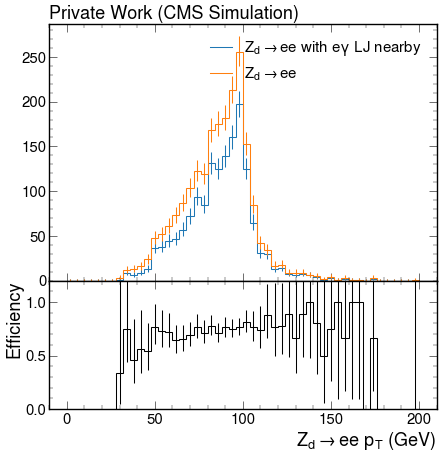

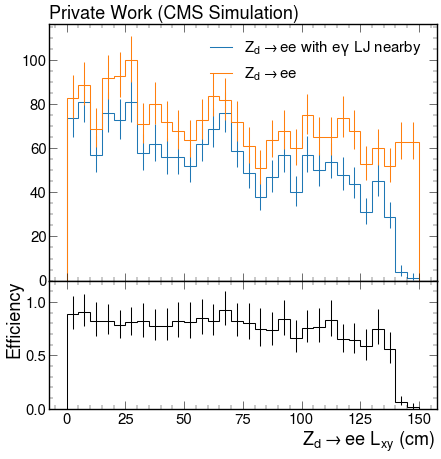

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:146: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


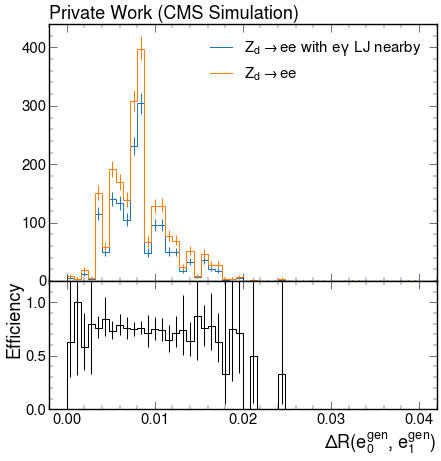

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:146: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


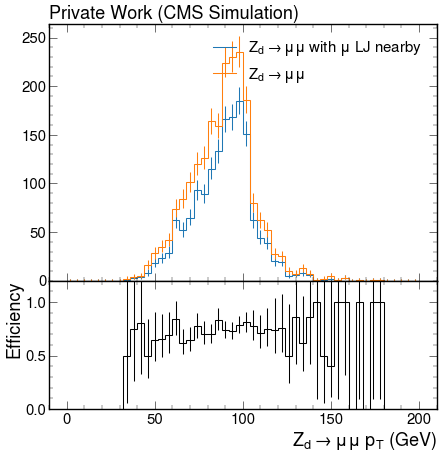

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:146: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


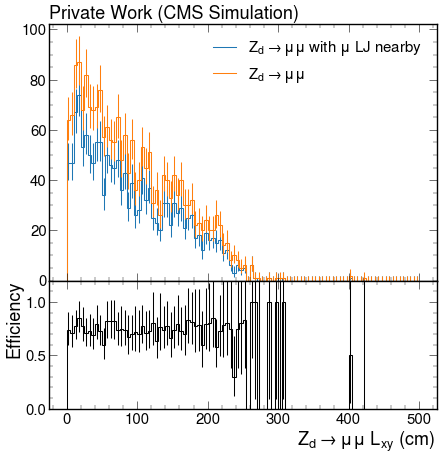

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:146: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


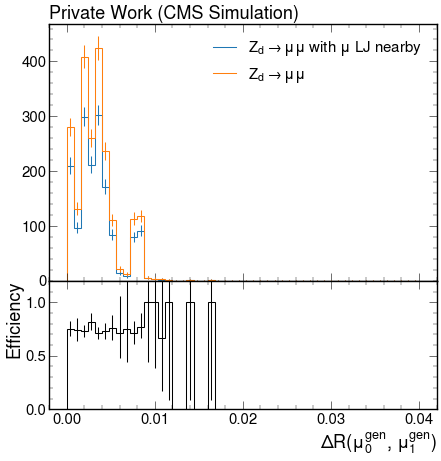

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:146: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


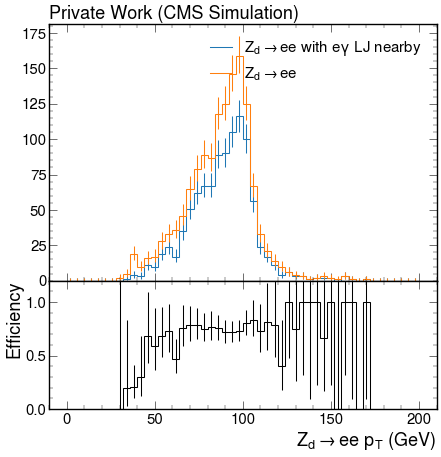

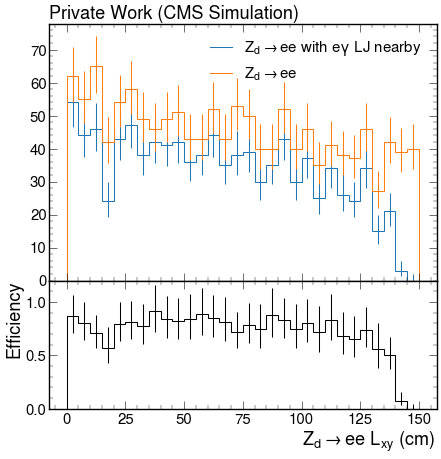

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:146: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


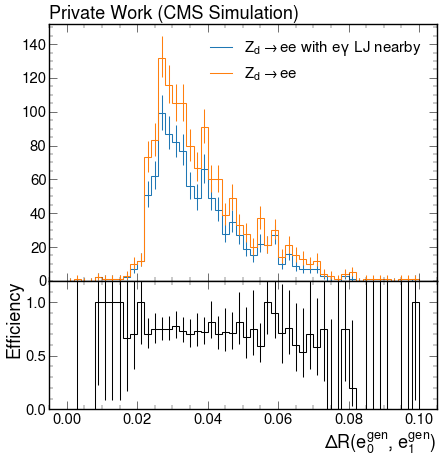

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:146: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


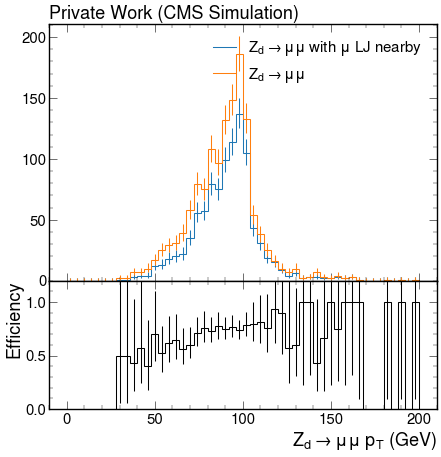

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:146: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


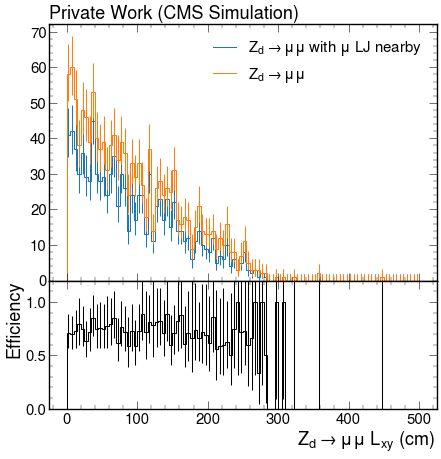

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:146: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


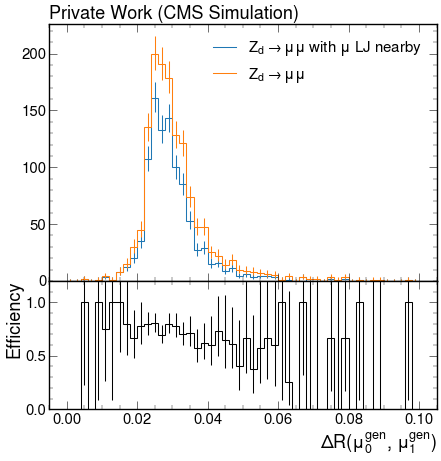

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:146: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


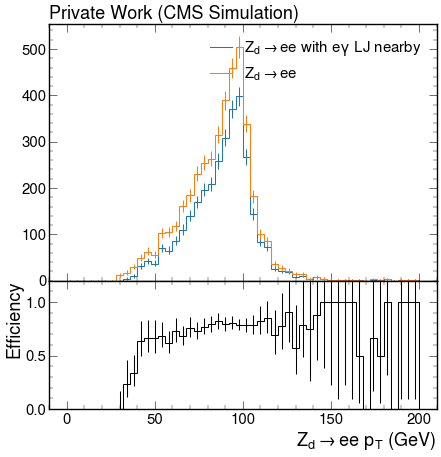

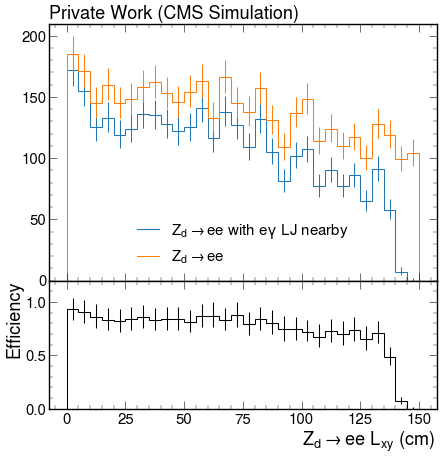

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:146: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


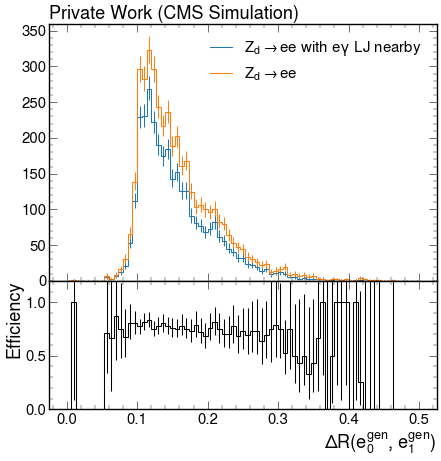

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:146: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


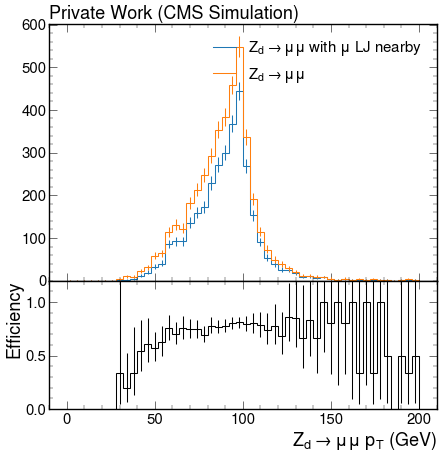

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:146: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


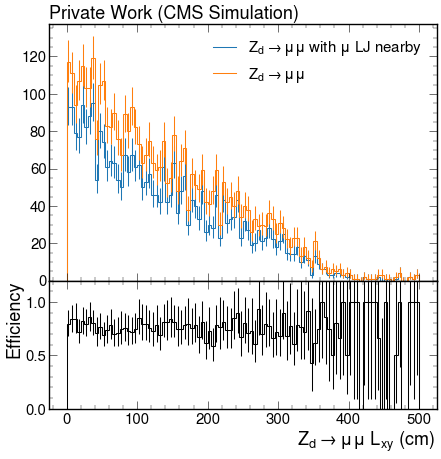

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:146: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


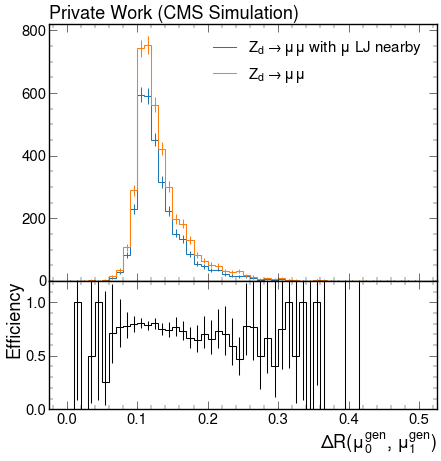

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:146: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


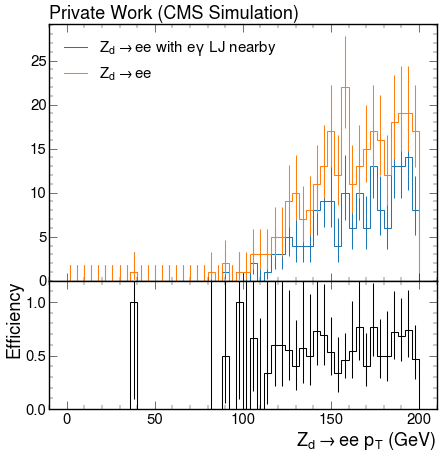

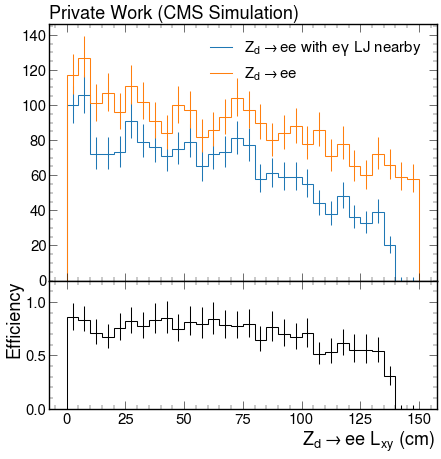

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:146: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


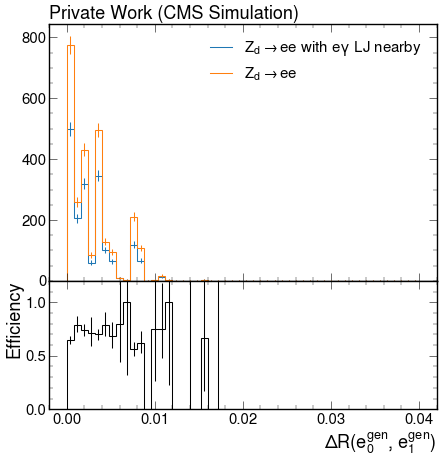

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:146: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


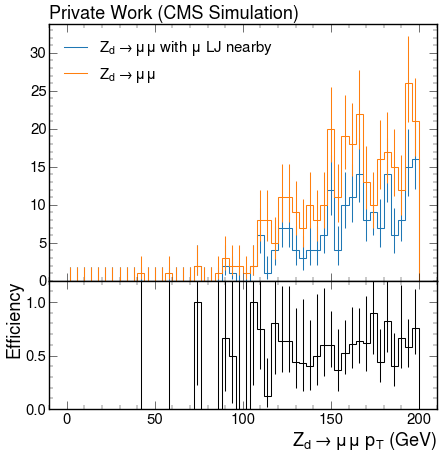

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:146: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


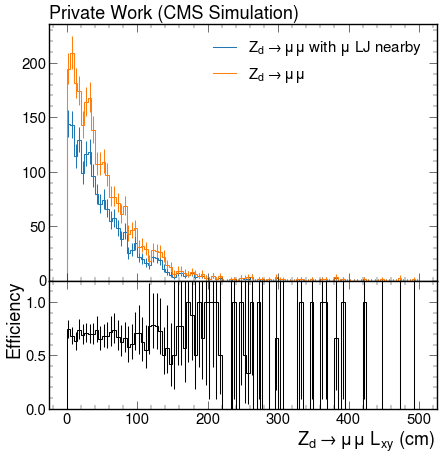

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:146: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


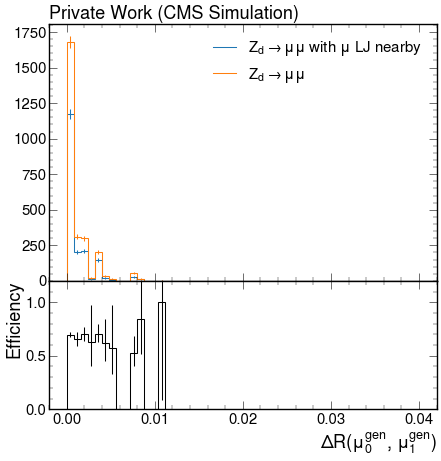

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:146: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


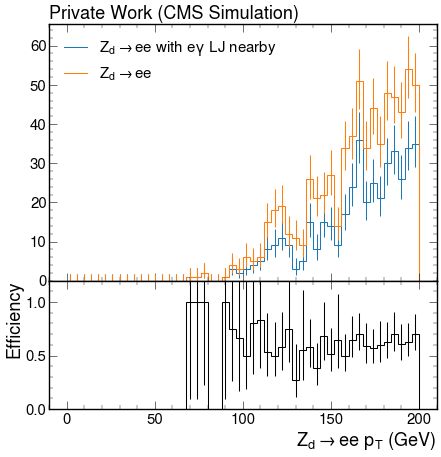

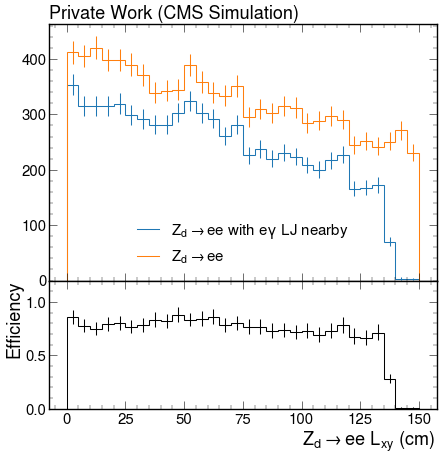

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:146: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


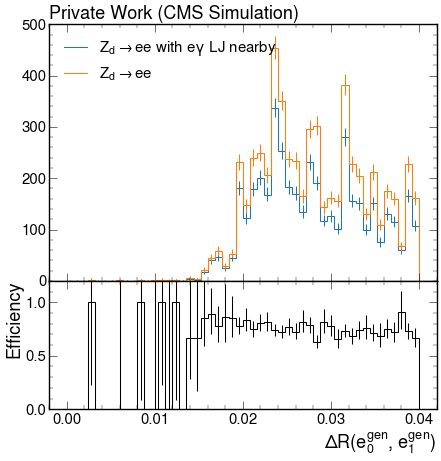

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:146: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


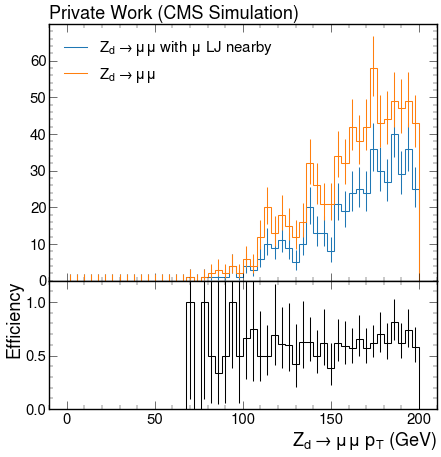

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:146: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


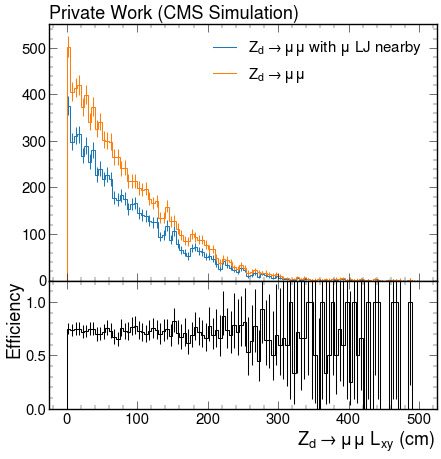

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:146: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


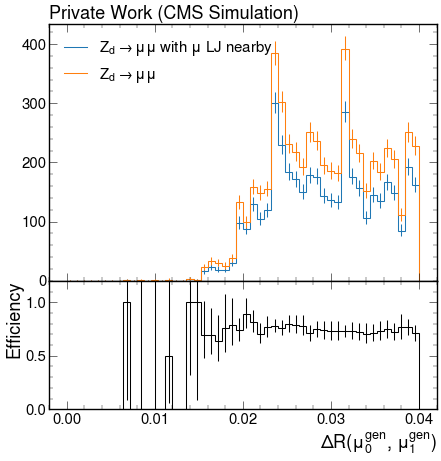

In [8]:
hists = output["out"]["2Mu2E_200GeV_0p25GeV_10p0mm"]["hists"]
num_label = r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby"
den_label = r"$Z_d \rightarrow ee $"
plot_save (hists,"genAs_toE_pt" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="200_0p25")
plot_save (hists,"genAs_toE_lxy" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="200_0p25")
plot_save (hists,"genE_genE_dR_XXLowRange" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="200_0p25")
num_label = r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby"
den_label = r"$Z_d \rightarrow \mu\mu $"
plot_save (hists,"genAs_toMu_pt" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="200_0p25")
plot_save (hists,"genAs_toMu_lxy" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="200_0p25")
plot_save (hists,"genMu_genMu_dR_XXLowRange" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="200_0p25")

hists = output["out"]["2Mu2E_200GeV_1p2GeV_48p0mm"]["hists"]
num_label = r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby"
den_label = r"$Z_d \rightarrow ee $"
plot_save (hists,"genAs_toE_pt" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="200_1p2")
plot_save (hists,"genAs_toE_lxy" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="200_1p2")
plot_save (hists,"genE_genE_dR_XLowRange" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="200_1p2")
num_label = r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby"
den_label = r"$Z_d \rightarrow \mu\mu $"
plot_save (hists,"genAs_toMu_pt" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="200_1p2")
plot_save (hists,"genAs_toMu_lxy" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="200_1p2")
plot_save (hists,"genMu_genMu_dR_XLowRange" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="200_1p2")

hists = output["out"]["2Mu2E_200GeV_5p0GeV_200p0mm"]["hists"]
num_label = r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby"
den_label = r"$Z_d \rightarrow ee $"
plot_save (hists,"genAs_toE_pt" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="200_5")
plot_save (hists,"genAs_toE_lxy" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="200_5")
plot_save (hists,"genE_genE_dR_lowRange" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="200_5")
num_label = r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby"
den_label = r"$Z_d \rightarrow \mu\mu $"
plot_save (hists,"genAs_toMu_pt" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="200_5")
plot_save (hists,"genAs_toMu_lxy" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="200_5")
plot_save (hists,"genMu_genMu_dR_lowRange" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="200_5")

hists = output["out"]["2Mu2E_1000GeV_0p25GeV_2p0mm"]["hists"]
num_label = r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby"
den_label = r"$Z_d \rightarrow ee $"
plot_save (hists,"genAs_toE_pt" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="1000_0p25")
plot_save (hists,"genAs_toE_lxy" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="1000_0p25")
plot_save (hists,"genE_genE_dR_XXLowRange" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="1000_0p25")
num_label = r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby"
den_label = r"$Z_d \rightarrow \mu\mu $"
plot_save (hists,"genAs_toMu_pt" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="1000_0p25")
plot_save (hists,"genAs_toMu_lxy" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="1000_0p25")
plot_save (hists,"genMu_genMu_dR_XXLowRange" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="1000_0p25")


hists = output["out"]["2Mu2E_1000GeV_5p0GeV_40p0mm"]["hists"]
num_label = r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby"
den_label = r"$Z_d \rightarrow ee $"
plot_save (hists,"genAs_toE_pt" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="1000_5")
plot_save (hists,"genAs_toE_lxy" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="1000_5")
plot_save (hists,"genE_genE_dR_XXLowRange" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="1000_5")
num_label = r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby"
den_label = r"$Z_d \rightarrow \mu\mu $"
plot_save (hists,"genAs_toMu_pt" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="1000_5")
plot_save (hists,"genAs_toMu_lxy" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="1000_5")
plot_save (hists,"genMu_genMu_dR_XXLowRange" , ch2, ch1, 
         legend=[num_label, den_label], 
           folder_name ="efficieny_plot", file_name="1000_5")

